# Project: Advanced Lane Finding

## Import packages

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Help functions

In [55]:
def display_images(images, titles=None, cols=2, cmap=None):
    rows = (len(images) + 1) // cols
    plt.figure(figsize=(15, 17))
    for i in range(len(images)):
        plt.subplot(rows, cols, i + 1)
        image = images[i]
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        if titles:
            plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
#         plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
#     plt.subplots_adjust(bottom=0, left=0, right=0, top=0, hspace=0)
    plt.tight_layout()
    plt.show()


# def display_images(images, cols = 2, titles = None, cmap=None):
#     """
#     Display a list of images in a single figure with matplotlib.
    
#     Parameters
#     ---------
#     images: List of np.arrays compatible with plt.imshow.
    
#     cols (Default = 1): Number of columns in figure (number of rows is 
#                         set to np.ceil(n_images/float(cols))).
    
#     titles: List of titles corresponding to each image. Must have
#             the same length as titles.
#     """
#     assert((titles is None)or (len(images) == len(titles)))
#     n_images = len(images)
# #     if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
#     fig = plt.figure()
#     for n, image in enumerate(images):
#         a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         cmap = 'gray' if len(image.shape)==2 else cmap
#         plt.imshow(image, cmap=cmap)
# #         a.set_title(title)
#     fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
#     plt.show()

# def display_images(images, cols = 2, cmap=None):
#     rows = (len(images) // cols)
#     fig, axeslist = plt.subplots(nrows=rows, ncols=cols)
#     index = 0
#     index_col = 0
#     for i, image in enumerate(images):
# #         if i % cols == 0:
# #             index += 1
# #         ax = axes[index]
#         cmap = 'gray' if len(image.shape)==2 else cmap
#         axeslist.ravel()[i].imshow(image, cmap=cmap)
        
#     plt.tight_layout()

## Camera calibration

Image distortion occurs when a camera looks at 3D objects in the real world and transforms them into a 2D image; this transformation isn’t perfect. Distortion actually changes what the shape and size of these 3D objects appear to be. So, the first step in analyzing camera images, is to undo this distortion so that you can get correct and useful information out of them. To do that, we will compute the camera calibration matrix and distortion coefficients given a set of chessboard images. Then, we will apply a distortion correction to raw images.

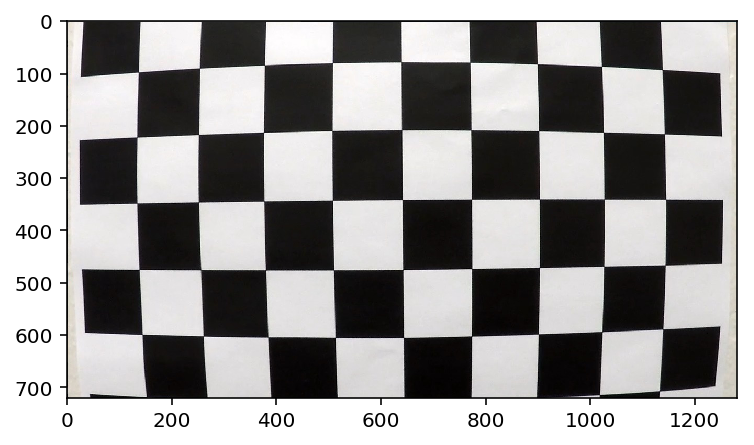

In [8]:
# read in a calibration image
img = mpimg.imread("./camera_cal/calibration1.jpg")
plt.imshow(img)

Let's Count the number of corners in any given row and enter that value in **nx**. Similarly, count the number of corners in a given column and store that in **ny**. Keep in mind that "corners" are only points where two black and two white squares intersect, in other words, only count inside corners, not outside corners.

We obtain a 9x6 chessboard.

In [76]:
nx = 9
ny = 6

In [77]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0)  ...,(8,4,0)
objp = np.zeros((ny*nx, 3), np.float32)
# the coordinate are in teh form of (x, y, z) and z remains 0 for all coordinate but for
# x & y we use numpy grid function to generate coodinates that we want
objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# make a list of calibration images
images = glob.glob("./camera_cal/calibration*.jpg")
chessboard_images = []
titles = []
count = 0

#step through the list and search for chessboard corners
for i, fname in enumerate(images):
    if i % 5 == 0:
        print("{} of {}".format((i+1), len(images)))
    img = cv2.imread(fname)
    chessboard_images.append(img)
    titles.append("original")
    
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # if found add object points and images points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # draw and display the corners
        chess = img.copy()
        chess = cv2.drawChessboardCorners(chess, (nx, ny), corners, ret)
        chessboard_images.append(chess)
        titles.append("Chessboard found")
        count += 1
    else:
        chessboard_images.append(img)
        titles.append("No chessboard found")
print("Found {} chessboard corners for {} images".format(count, len(images)))

1 of 20
6 of 20
11 of 20
16 of 20
Found 17 chessboard corners for 20 images


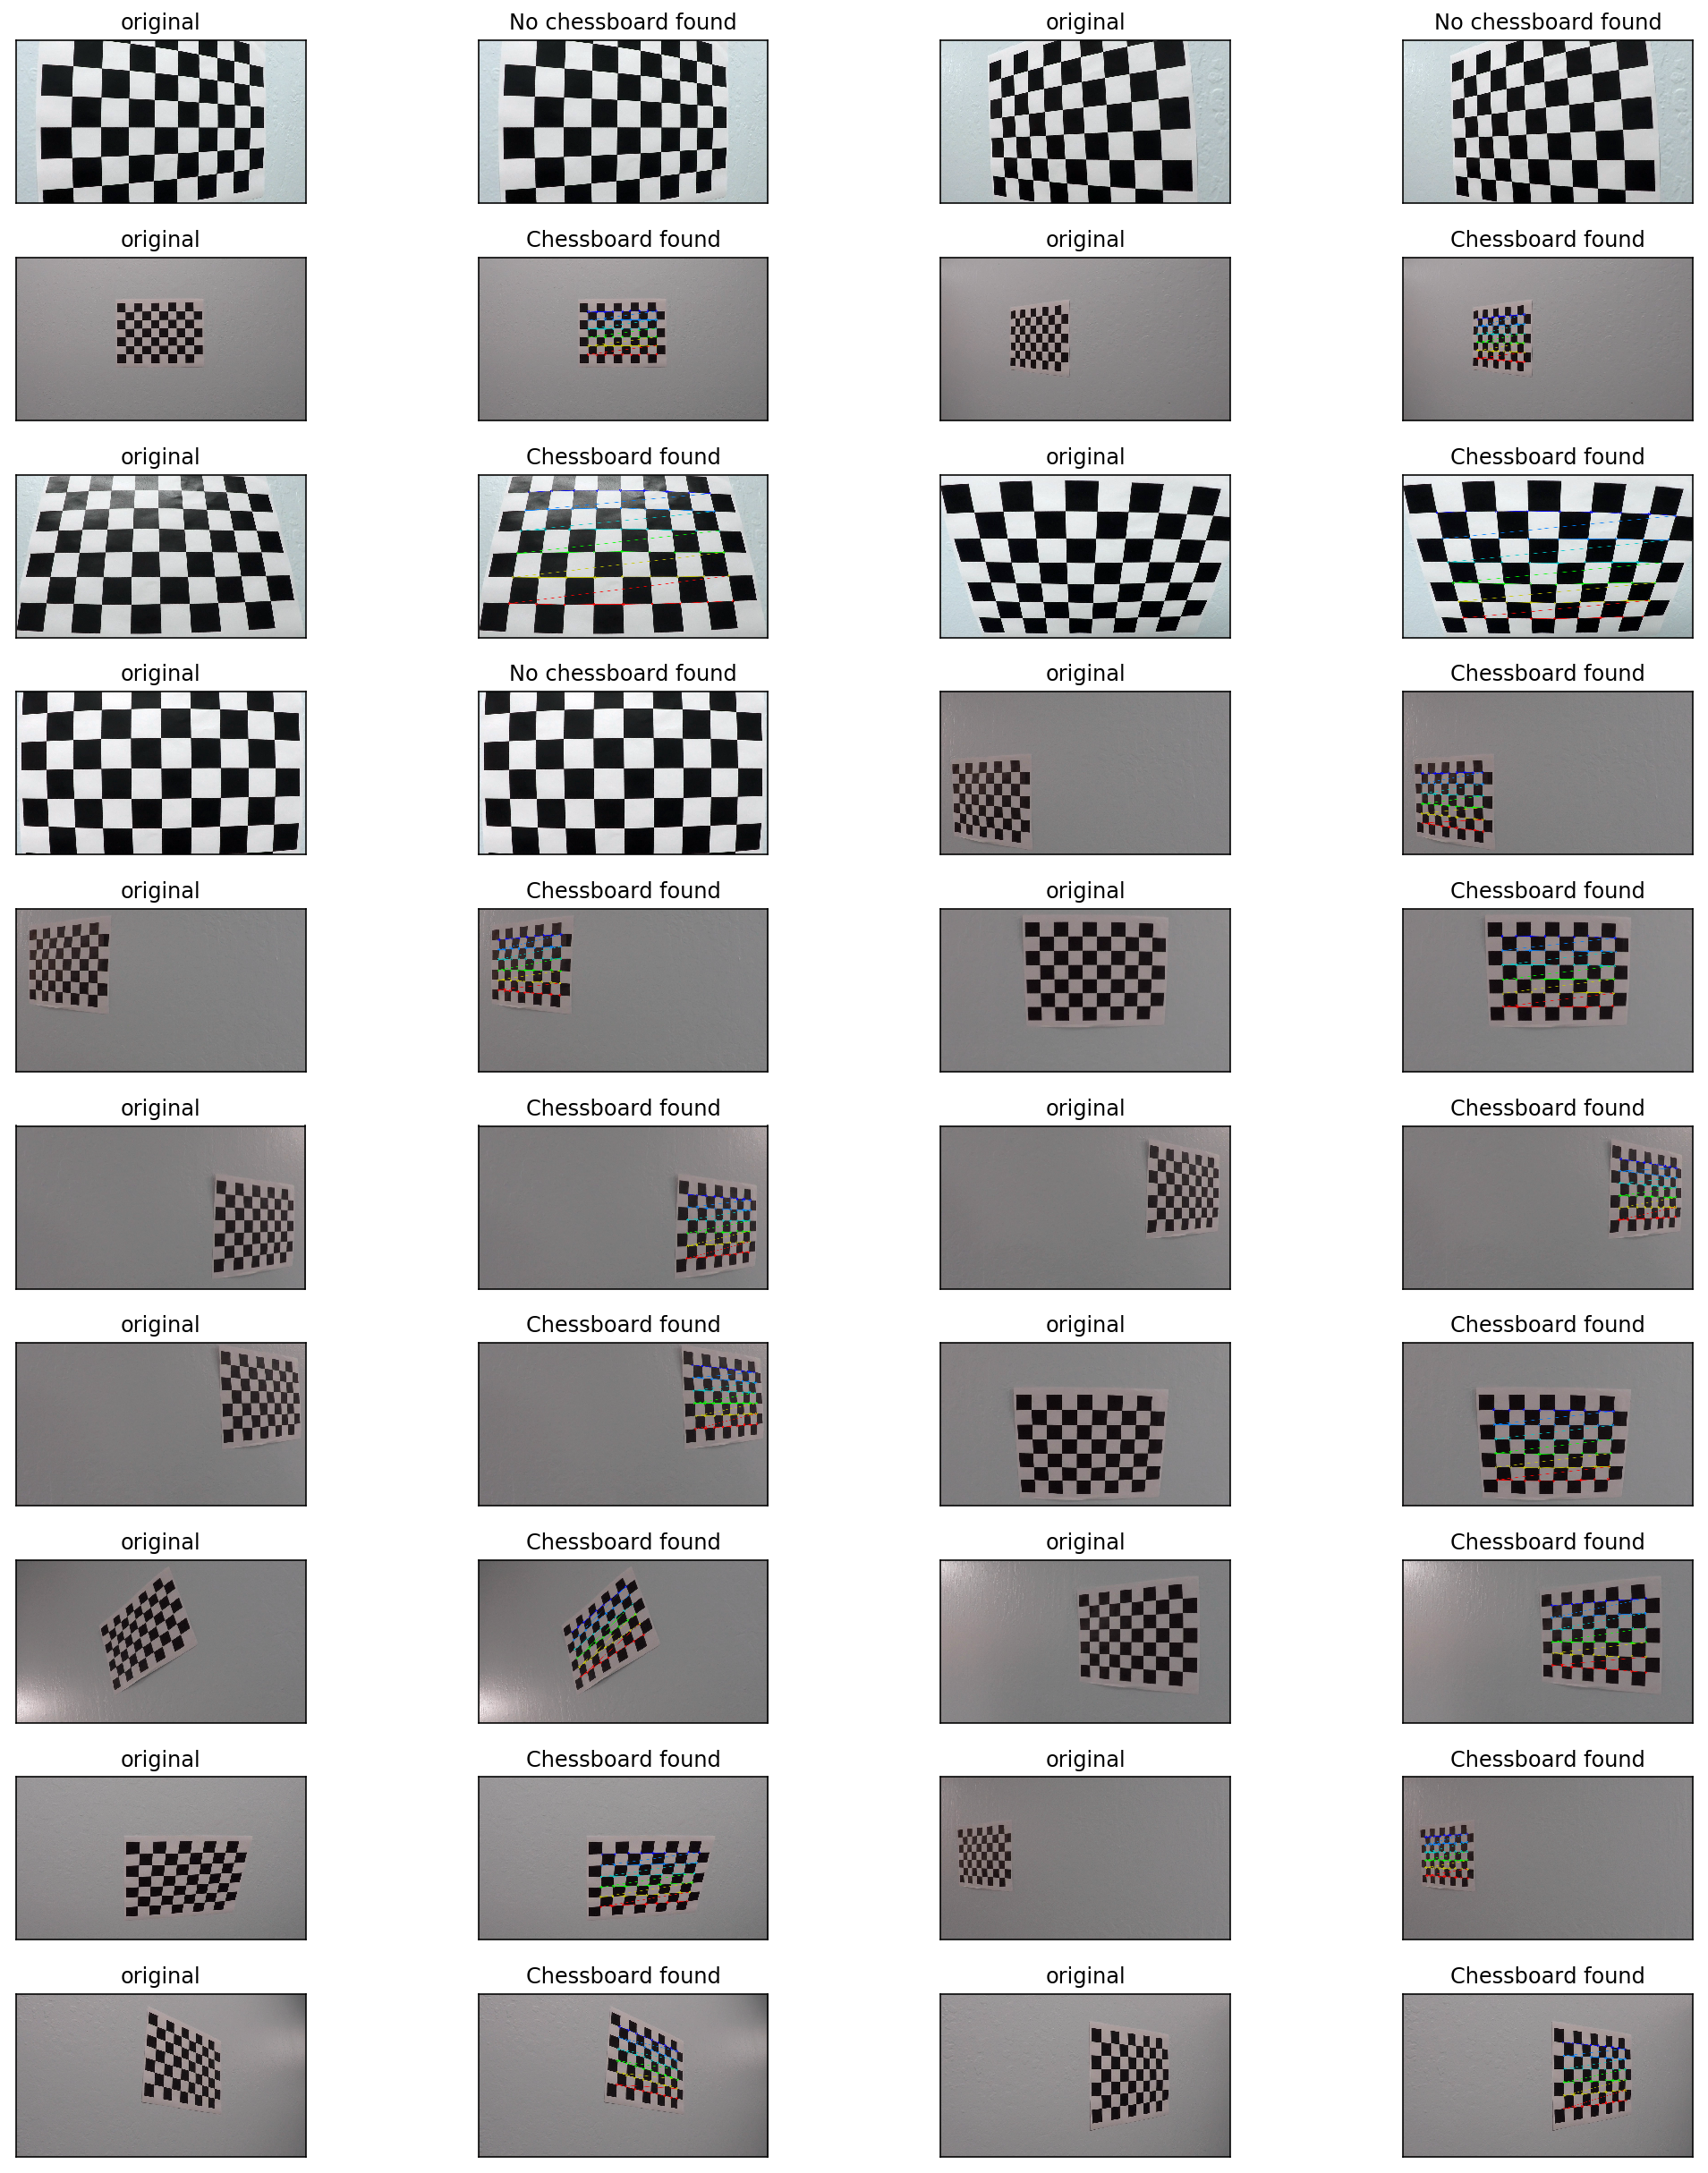

In [67]:
display_images(chessboard_images, titles, cols=4)

### Correcting for distorsion

Let's use the output objpoints and imgpoints to compute the camera calibration and distortion coefficients using the cv2.calibrateCamera() function. We applie this distortion correction to the test image using the cv2.undistort() function.

In [79]:
def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

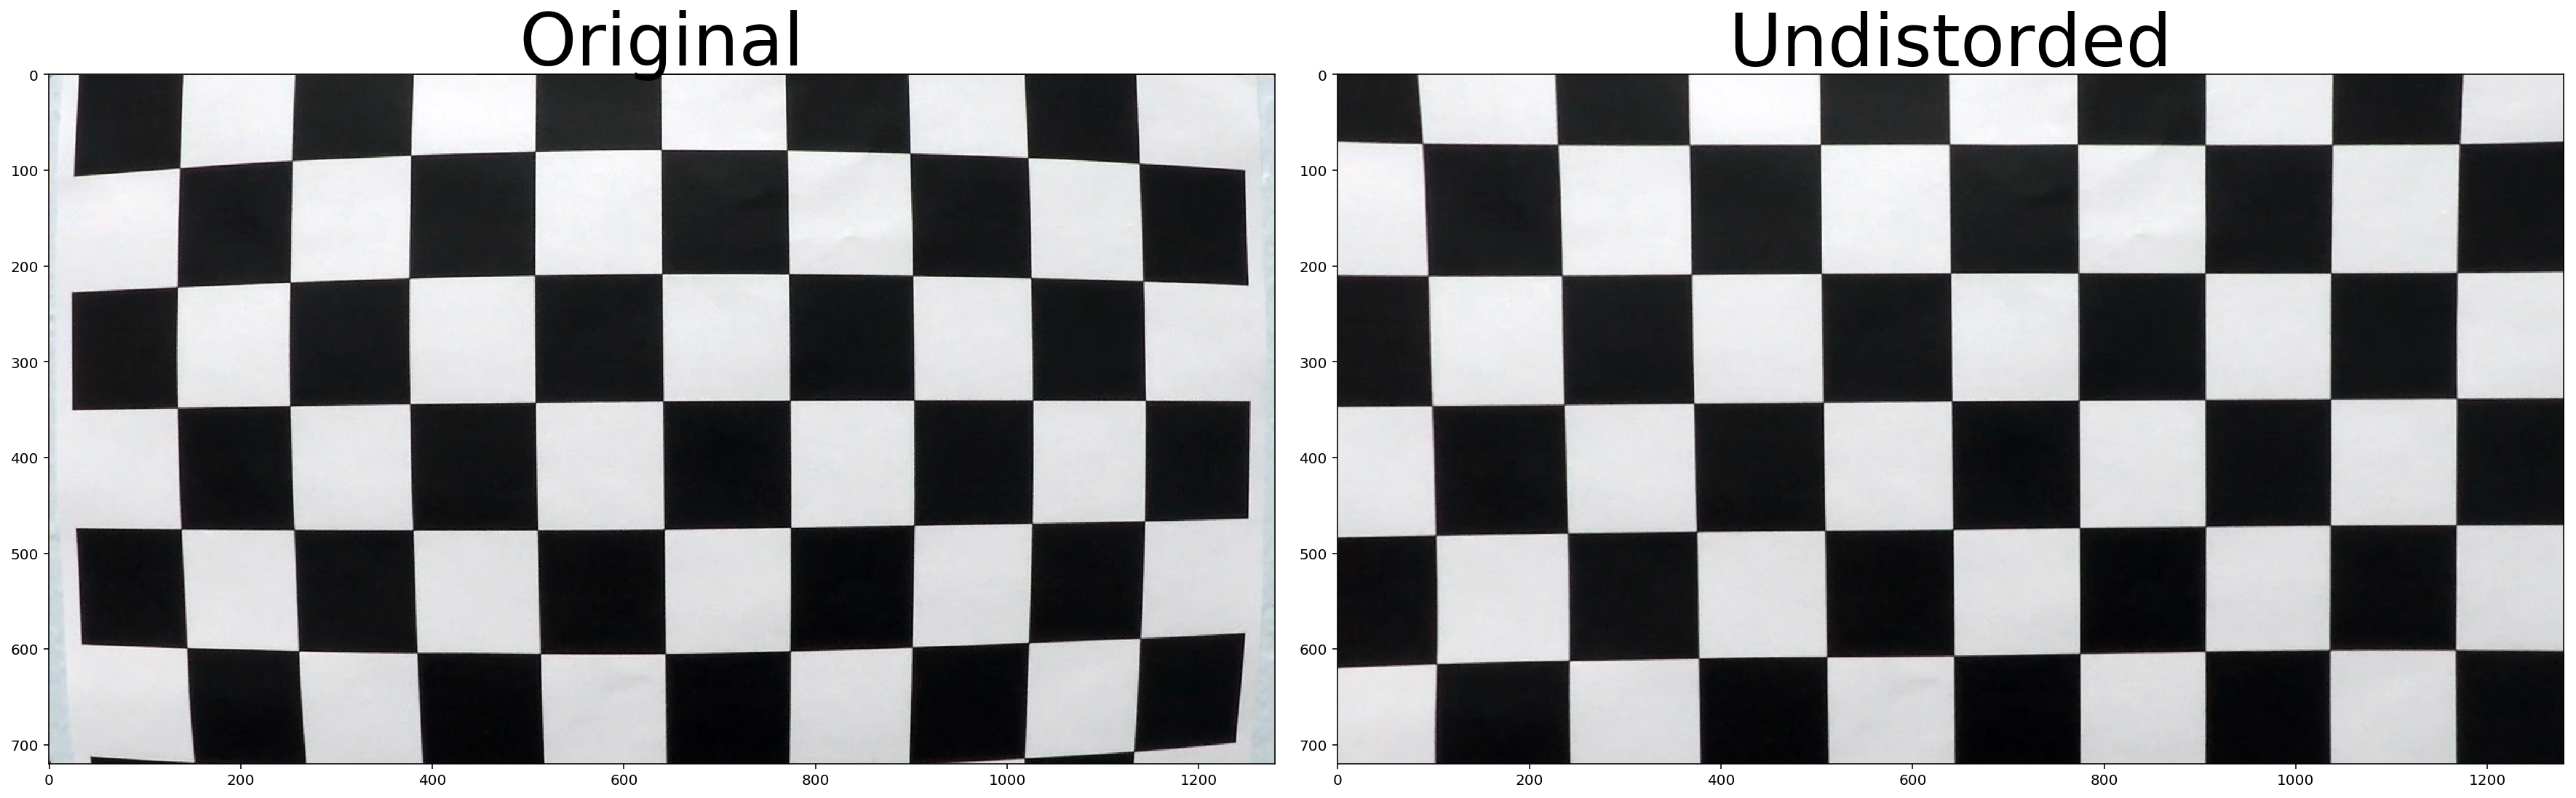

In [83]:
distorded = cv2.imread('./camera_cal/calibration1.jpg')
undistorted = cal_undistort(distorded, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(distorded)
ax1.set_title('Original', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorded', fontsize=50)
plt.subplots_adjust(left=0., right=1., top=0.9, bottom=0.)